In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Spearman Correlation Using Heart Attack Dataset

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSTcXt6jzQGEjcnbsisOPOZsSW-VT_qDjG2pJC4qO3m5DduYGVsdU9CAq-1xDO625-_kciEw2OTpWC9/pub?gid=488631647&single=true&output=csv')

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
df['class'] = df['class'].replace(
    {
    'positive' : 1,
    'negative' : 0
    }
)

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


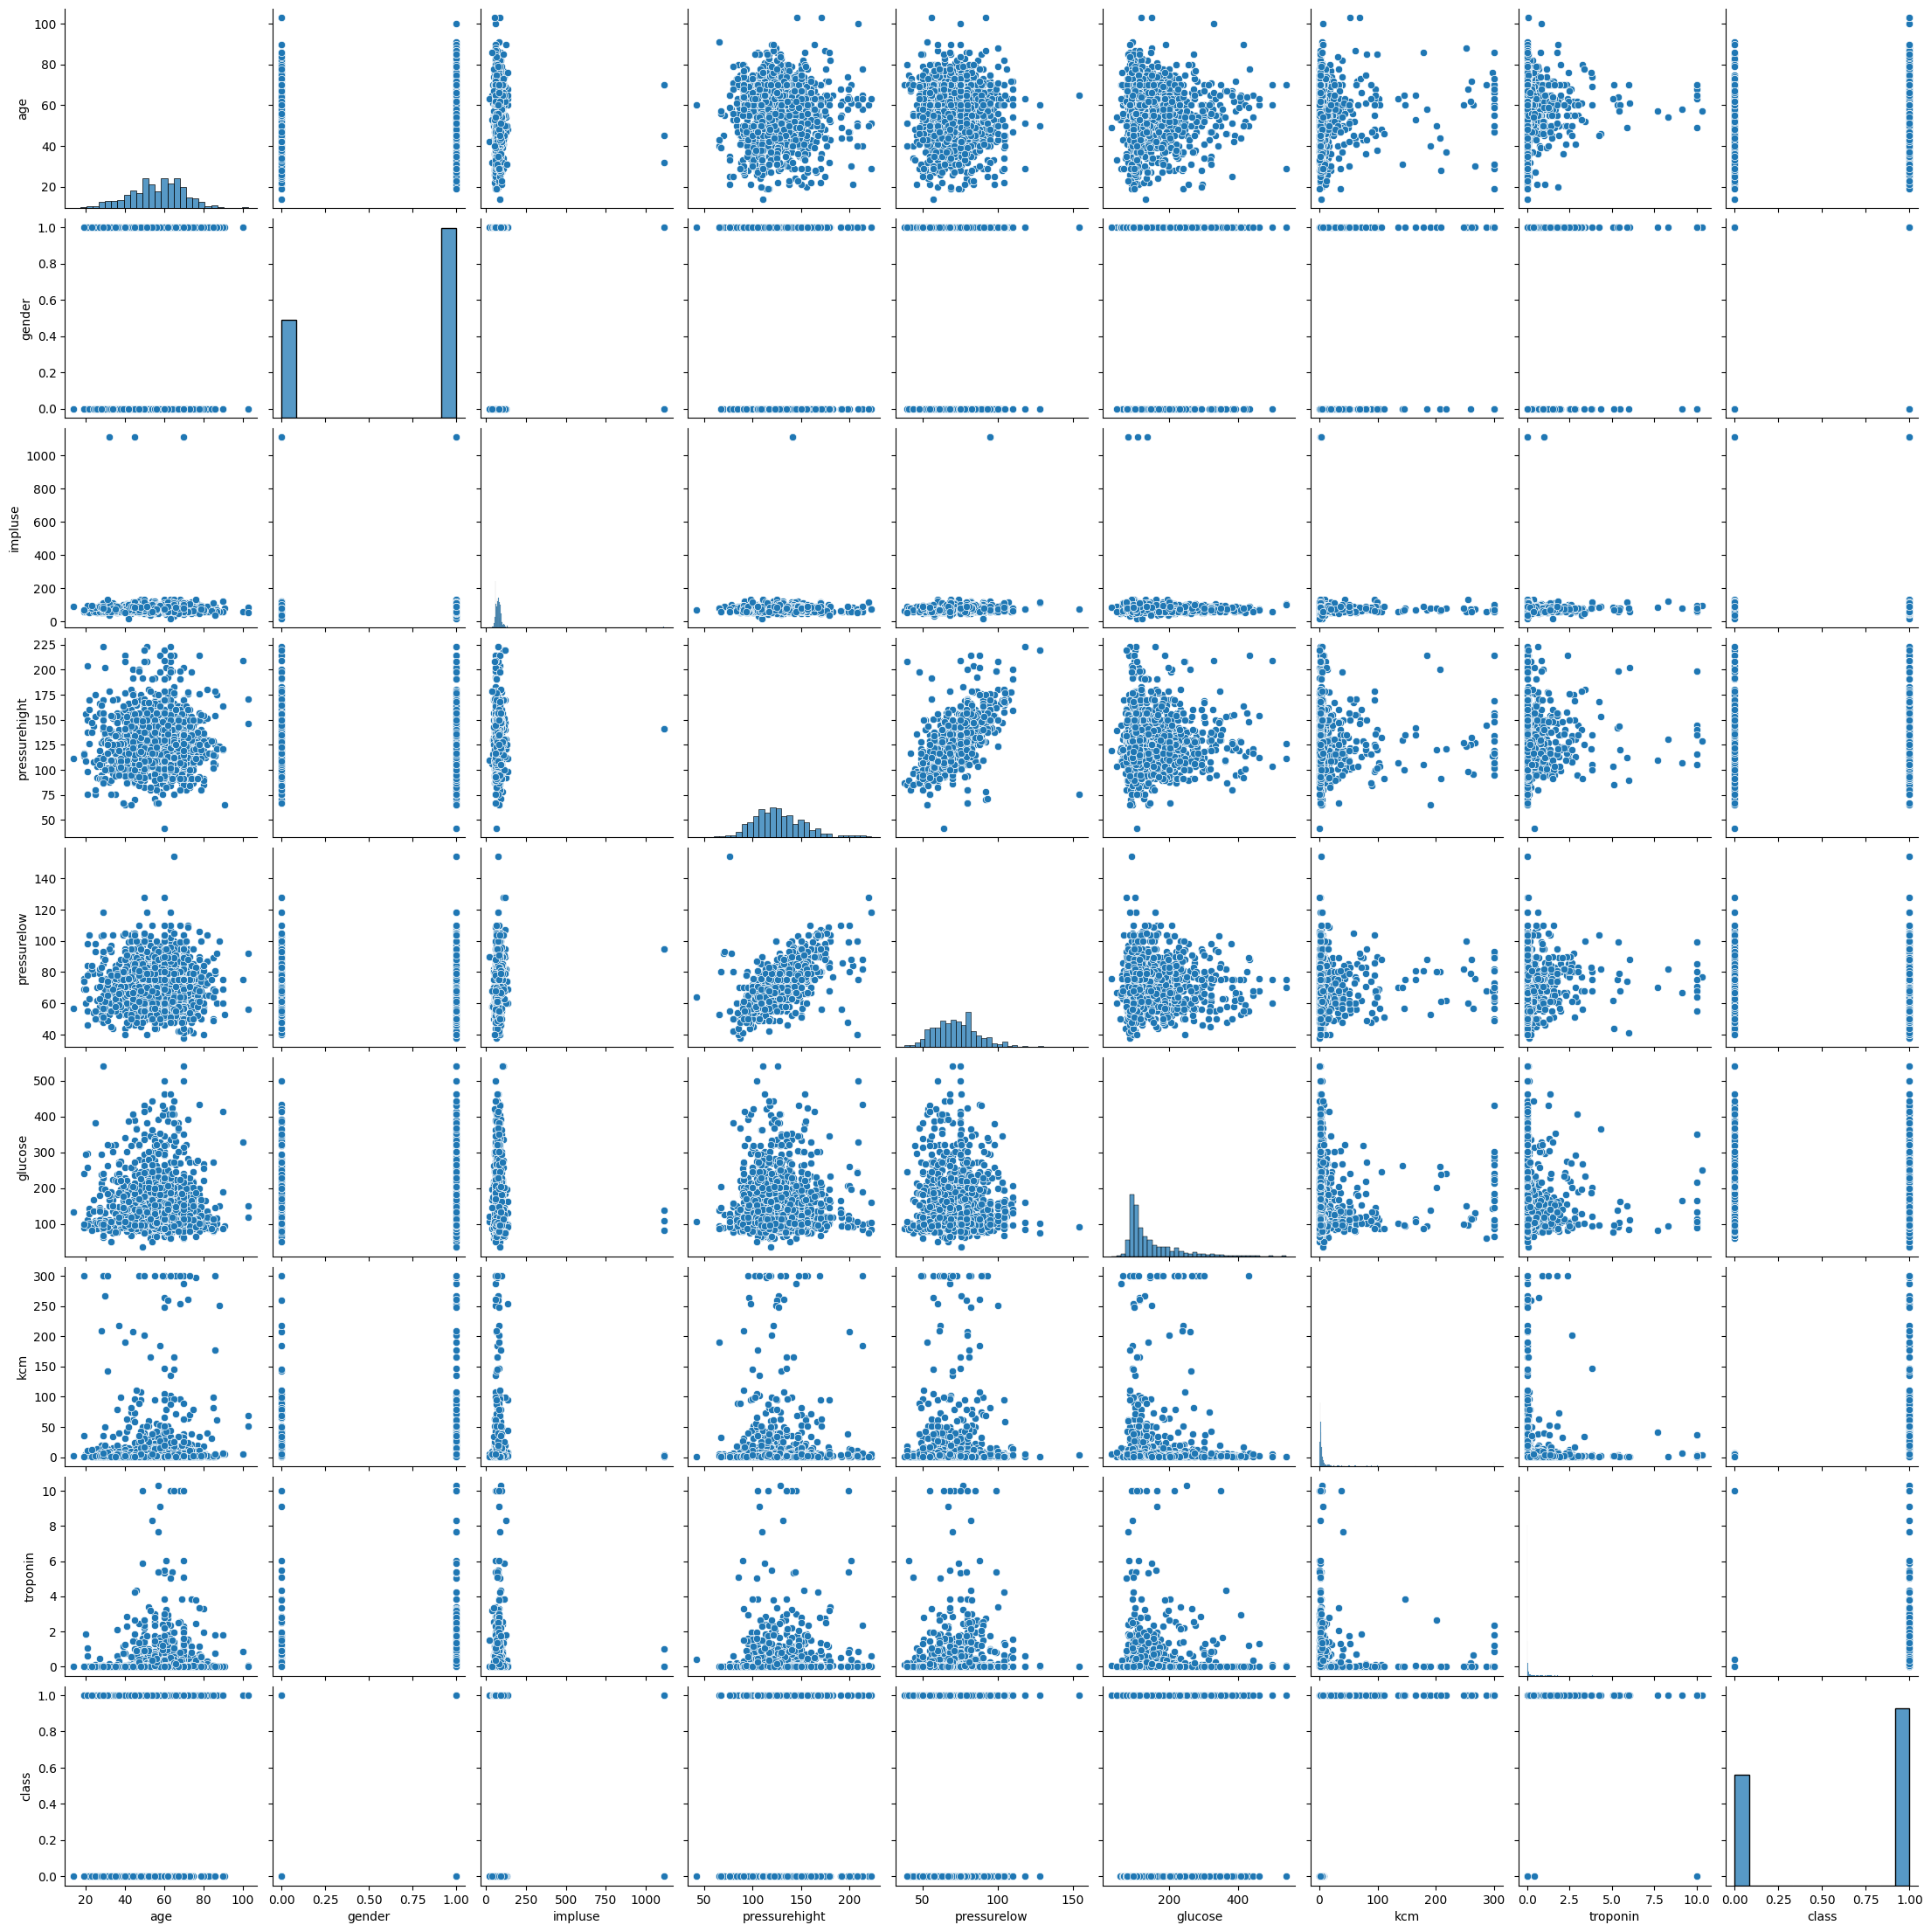

In [ ]:
sns.pairplot(df)

Based on the visualization of this pairplot, it
can be concluded that the histogram shows
some variables are not normally distributed,
the scatterplot shows some variables show
a non-linear relationship, and there are
outliers in some variables.
Based on these conclusions, the correlation
analysis method that can be used is
Spearman Correlation. This method is the
most appropriate choice because it does
not assume a linear relationship and is more
resistant to outliers.


In [ ]:
df.corr(method='spearman')

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
age,1.000000,-0.097088,-0.014182,0.016118,-0.001533,-0.016443,-0.037751,0.364720,0.235370
gender,-0.097088,1.000000,-0.006001,0.014829,-0.005963,0.013504,0.027570,0.136062,0.094432
impluse,-0.014182,-0.006001,1.000000,-0.024364,0.139432,0.015453,0.001760,0.009329,0.001189
pressurehight,0.016118,0.014829,-0.024364,1.000000,0.606070,0.025352,-0.026587,0.010039,-0.036541
pressurelow,-0.001533,-0.005963,0.139432,0.606070,1.000000,0.004182,-0.020457,0.037223,-0.007883
glucose,-0.016443,0.013504,0.015453,0.025352,0.004182,1.000000,0.020419,0.006783,-0.017931
kcm,-0.037751,0.027570,0.001760,-0.026587,-0.020457,0.020419,1.000000,-0.048484,0.304004
troponin,0.364720,0.136062,0.009329,0.010039,0.037223,0.006783,-0.048484,1.000000,0.664682
class,0.235370,0.094432,0.001189,-0.036541,-0.007883,-0.017931,0.304004,0.664682,1.000000


<Axes: >

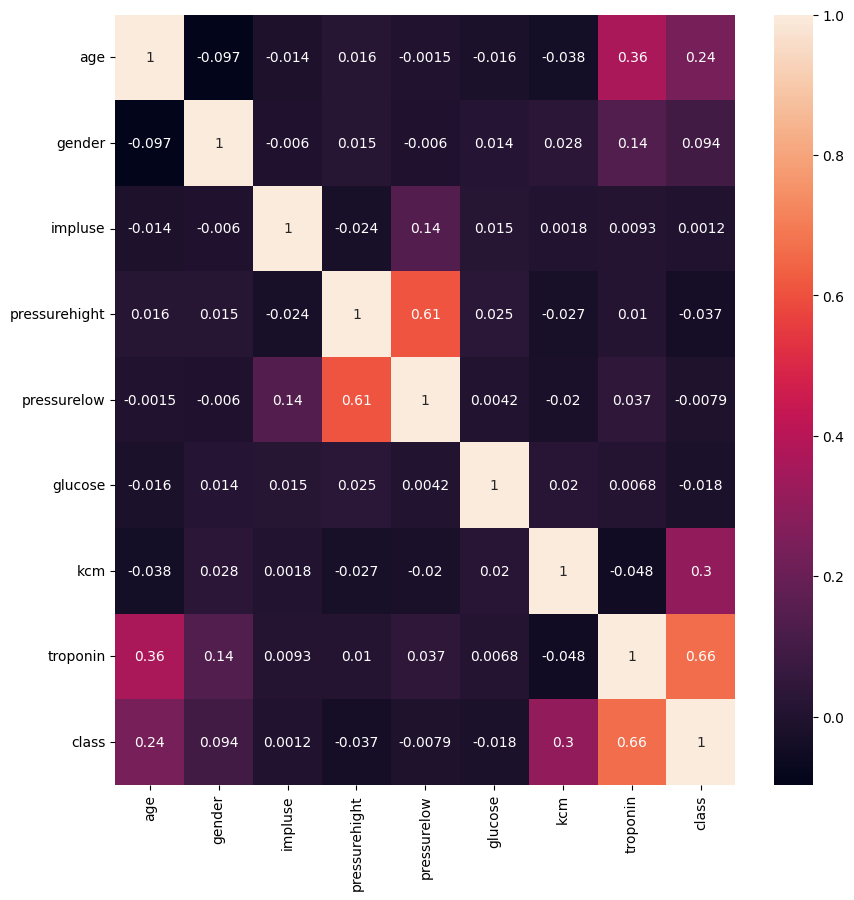

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman'), annot=True)

Based on the results of this spearman correlation, it can be analyzed as follows:
*	There is a strong positive correlation between pressurelow and pressurehight. This indicates the relationship between the two is that the higher the pressurelow, the higher the pressurehight.
*	There is a strong positive correlation between troppin and class, which indicates that the higher the troppin, the higher the class.
*	There are weak positive correlation between age and pressurehight and tropponin. Weak negative correlation between age and kcm. This indicates that the older the age, the higher the pressurehight and tropponin, and the lower the kcm.
*	There is a weak positive correlation between gender and pressurehight and tropponin.
*	There is a weak positive correlation between impulse and pressurelow. This indicates that the higher the impulse, the higher the pressurelow.
*	There is a weak positive correlation between kcm and glucose. Weak negative correlation between kcm and troppin. This indicates the higher the kcm, the higher the glucose and the lower the troponin.



# Chi-Square Test Using Disease Symptom & Patient Profile Dataset

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTbFOgvRGWYyABV18PdtzDD36VxdG5L9lkWsjBDBUh8PhL1ImRYAy7asMmx0h8kDiFwZtNYs4bmOa9_/pub?gid=1608649907&single=true&output=csv')

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
# H0: There is no relationship between risk factors and disease. Fever, Cough, Fatigue, and Difficulty Breathing
# H1: There is an relationship between the risk factor and the disease.

# Create a contingency table
fever_table = pd.crosstab(df['Fever'], df['Disease'])
cough_table = pd.crosstab(df['Cough'], df['Disease'])
fatigue_table = pd.crosstab(df['Fatigue'], df['Disease'])
difficulty_breathing_table = pd.crosstab(df['Difficulty Breathing'], df['Disease'])

# Calculate the chi-square value
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(fever_table)
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(cough_table)
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(fatigue_table)
chi2_4, p_4, dof_4, expected_4 = chi2_contingency(difficulty_breathing_table)

# Result
print("Fever: chi2 =", chi2_1, "p-value =", p_1)
print("Cough: chi2 =", chi2_2, "p-value =", p_2)
print("Fatigue: chi2 =", chi2_3, "p-value =", p_3)
print("Difficulty Breathing: chi2 =", chi2_4, "p-value =", p_4)

Fever: chi2 = 133.99844185220314 p-value = 0.10876805588704469
Cough: chi2 = 122.99098770754173 p-value = 0.28811297746360454
Fatigue: chi2 = 113.92397611815554 p-value = 0.5108348011765593
Difficulty Breathing: chi2 = 222.63230681962412 p-value = 7.207310212714828e-09


Result Interpretation:
* For Fever, Cough, and Fatigue, because the p-value is greater than 0.05, H0 is accepted. It can be
concluded that there is no significant relationship between Fever, Cough, and Fatigue and the variable
Disease.
* For Difficulty Breathing, because the p-value is smaller than 0.05, H0 is rejected. It can be concluded that
there is a significant relationship between difficulty breathing and the variable Disease.

In [ ]:
# H0: There is no relationship between risk factors and diagnosis.
# H1: There is an relationship relationship between risk factors and diagnosis.

# Create a contingency table
fever_table = pd.crosstab(df['Fever'], df['Outcome Variable'])
cough_table = pd.crosstab(df['Cough'], df['Outcome Variable'])
fatigue_table = pd.crosstab(df['Fatigue'], df['Outcome Variable'])
difficulty_breathing_table = pd.crosstab(df['Difficulty Breathing'], df['Outcome Variable'])

# Calculate the chi-square value
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(fever_table)
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(cough_table)
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(fatigue_table)
chi2_4, p_4, dof_4, expected_4 = chi2_contingency(difficulty_breathing_table)

# Result
print("Fever: chi2 =", chi2_1, "p-value =", p_1)
print("Cough: chi2 =", chi2_2, "p-value =", p_2)
print("Fatigue: chi2 =", chi2_3, "p-value =", p_3)
print("Difficulty Breathing: chi2 =", chi2_4, "p-value =", p_4)

Fever: chi2 = 10.685361457819145 p-value = 0.0010798663276792668
Cough: chi2 = 0.011665175063912224 p-value = 0.9139913769807648
Fatigue: chi2 = 5.999096155823578 p-value = 0.014313209365118021
Difficulty Breathing: chi2 = 2.659366122632544 p-value = 0.10294175091273541


Result Interpretation:
* For Cough and Difficulty Breathing, because the p-value is greater than 0.05, H0 is accepted. It can be
concluded that there is no significant relationship between Cough and Difficulty Breathing and the variable
Diagnosis (Outcome Variable).
* For Fever and Fatigue, because the p-value is smaller than 0.05, H0 is rejected. It can be concluded that
there is a significant relationship between Fever and Fatigue and the variable Diagnosis (Outcome Variable).

In [ ]:
# H0: There is no relationship between demographics and disease.
# H1: There is a relationship between demographics and disease.

# Create a contingency table
age_table = pd.crosstab(df['Age'], df['Disease'])
gender_table = pd.crosstab(df['Gender'], df['Disease'])

# Calculate the chi-square value
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(age_table)
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(gender_table)

# Result
print("Age: chi2 =", chi2_1, "p-value =", p_1)
print("Gender: chi2 =", chi2_2, "p-value =", p_2)

Age: chi2 = 2356.5397183823616 p-value = 0.9999999999998437
Gender: chi2 = 110.24726514944122 p-value = 0.6078348856120617


Result Interpretation:
* Because the p-value is greater than 0.05, H0 is accepted. It can be concluded that there is no significant
relationship between Age and Gender and the variable Disease.

In [ ]:
# H0: There is no relationship between medical factors and disease.
# H1: There is a relationship between media factors and disease.

# Create a contingency table
bp_table = pd.crosstab(df['Blood Pressure'], df['Disease'])
cl_table = pd.crosstab(df['Cholesterol Level'], df['Disease'])

# Calculate the chi-square value
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(bp_table)
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(cl_table)

# Result
print("Blood Pressure: chi2 =", chi2_1, "p-value =", p_1)
print("Cholestrol Level: chi2 =", chi2_2, "p-value =", p_2)

Blood Pressure: chi2 = 163.59115530563793 p-value = 0.99969324692525
Cholestrol Level: chi2 = 229.4266565428612 p-value = 0.49826783472533487


Result Interpretation:
* Because medical factors have a p-value greater than 0.05, H0 is accepted. It can be concluded that there is no significant relationship between Blood Pressure and Cholesterol Level and the variable Disease.

In [ ]:
# H0: There is no relationship between medical factors and diagnosis.
# H1: There is a relationship between media factors and diagnosis.

# Create a contingency table
bp_table = pd.crosstab(df['Blood Pressure'], df['Outcome Variable'])
cl_table = pd.crosstab(df['Cholesterol Level'], df['Outcome Variable'])

# Calculate the chi-square value
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(bp_table)
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(cl_table)

# Result
print("Blood Pressure: chi2 =", chi2_1, "p-value =", p_1)
print("Cholestrol Level: chi2 =", chi2_2, "p-value =", p_2)

Blood Pressure: chi2 = 14.559140940550813 p-value = 0.0006894816529631791
Cholestrol Level: chi2 = 33.96377257004794 p-value = 4.215610660636712e-08


Result Interpretation:
* Because medical factors have a p-value smaller than 0.05, H0 is rejected. It can be concluded that there is a significant relationship between Blood Pressure and Cholesterol Level and the variable Diagnosis (Outcome Variable).

# Linear Regression Using Heart Disease Prediction Dataset

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTkAfMOjwWiCsI36XLvfN0BzZEMRj3UkdxcUSGJyHAN1uKL8XtGK37gtwBhf-HrIjrQgeLnMVrUecwd/pub?gid=643436542&single=true&output=csv')

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df['Heart Disease'] = df['Heart Disease'].replace(
    {
    'Presence' : 1,
    'Absence' : 0
    }
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
# Select the column to use
X = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
        'Slope of ST', 'Number of vessels fluro', 'Thallium']]
y = df['Heart Disease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division of data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear regression modeling
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using data test
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R^2): {r2}')

# Interpretation of regression coefficient
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Added a column with constant values for the regression model
X_train_with_const = sm.add_constant(X_train)

# Create a linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()

# Print the model summary to get the p-value
print(results.summary())

Mean Squared Error (MSE): 0.10861936381640466
Coefficient of Determination (R^2): 0.5429522873179857
                   Variable  Coefficient
0                       Age    -0.014526
1                       Sex     0.074366
2           Chest pain type     0.090144
3                        BP     0.046454
4               Cholesterol     0.028623
5              FBS over 120    -0.037890
6               EKG results     0.010026
7                    Max HR    -0.032569
8           Exercise angina     0.056672
9             ST depression     0.069563
10              Slope of ST     0.042220
11  Number of vessels fluro     0.111255
12                 Thallium     0.107124
                            OLS Regression Results                            
Dep. Variable:          Heart Disease   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     17.65
Date:    

Overall, the model appears statistically significant based on the F-statistic (17.65) and p-value (p-value <0.05). The model can also explain a moderate portion of the variance in Heart Disease based on the R-squared value (53.2%). Independent variables collectively contributed to the prediction of Heart Disease.


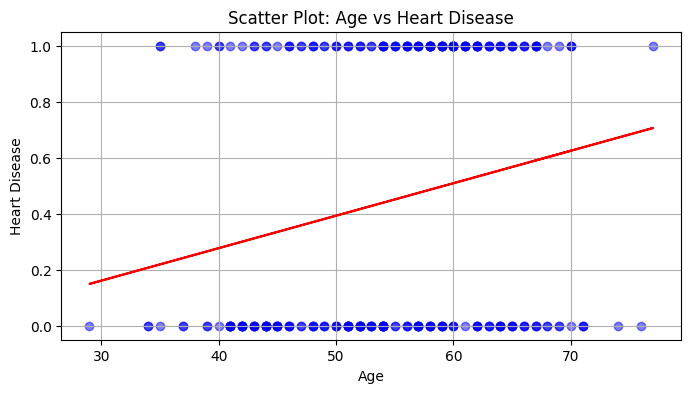

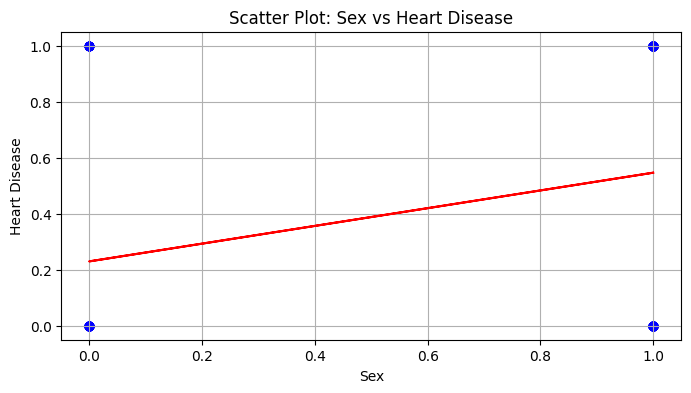

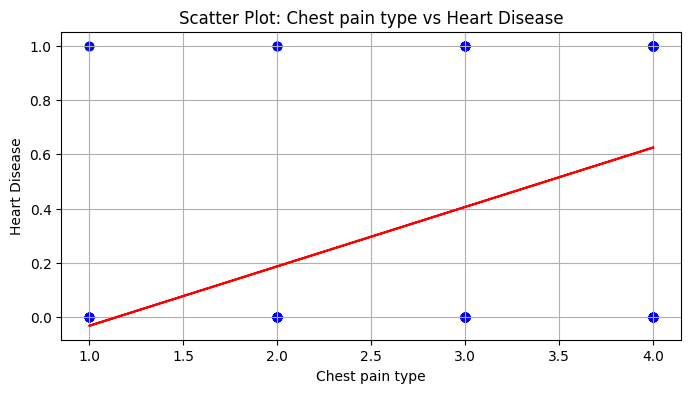

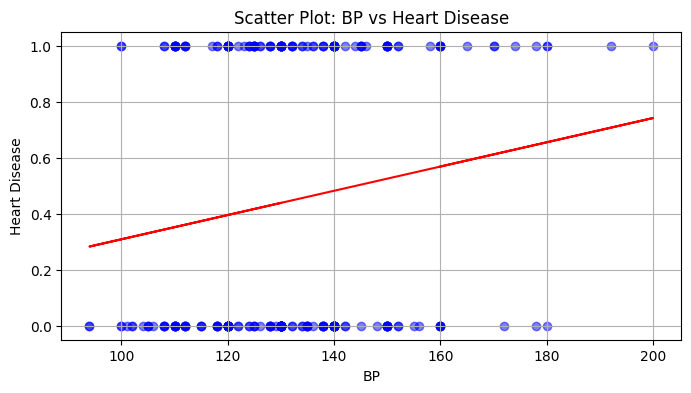

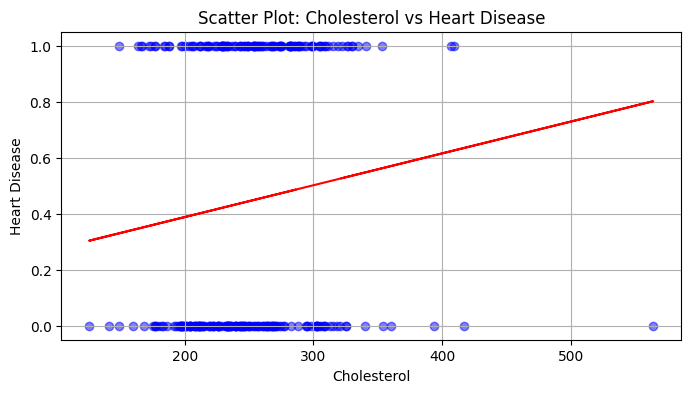

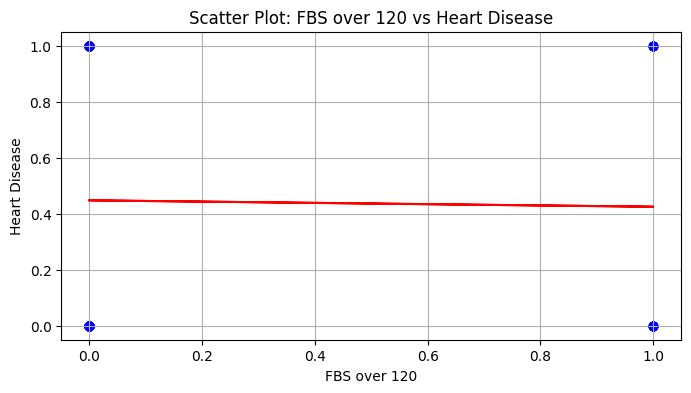

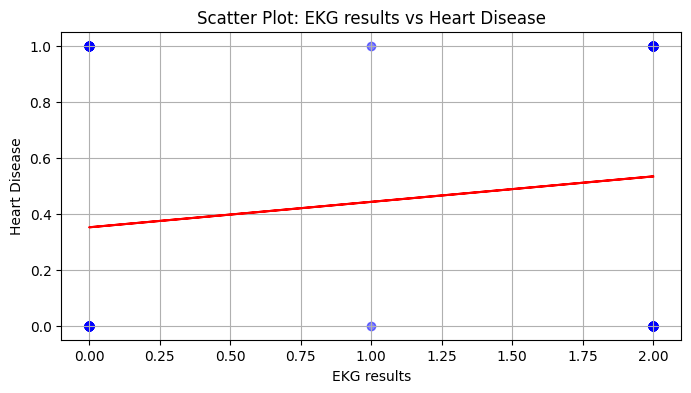

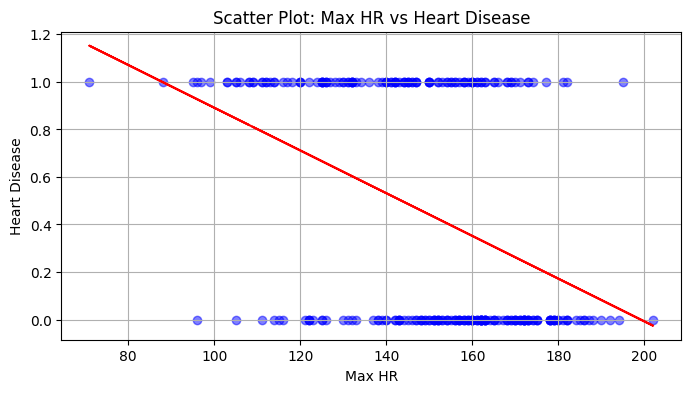

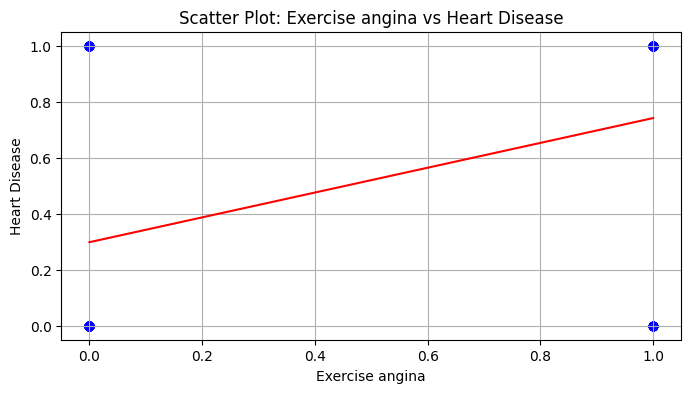

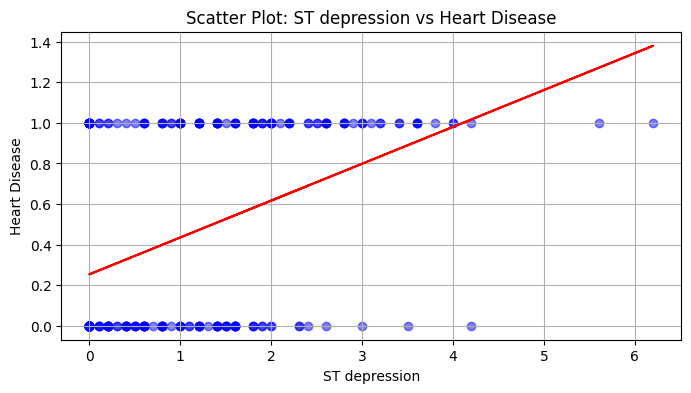

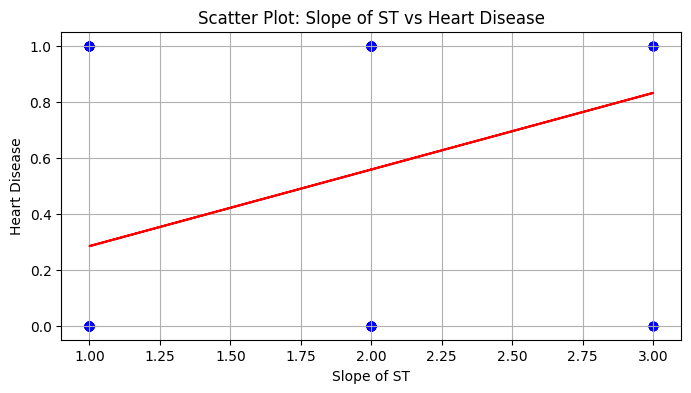

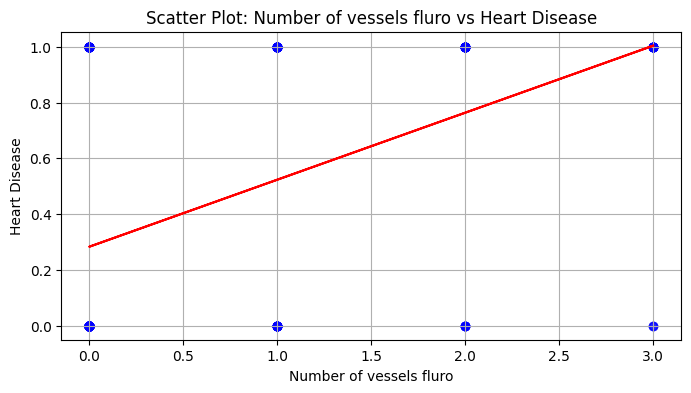

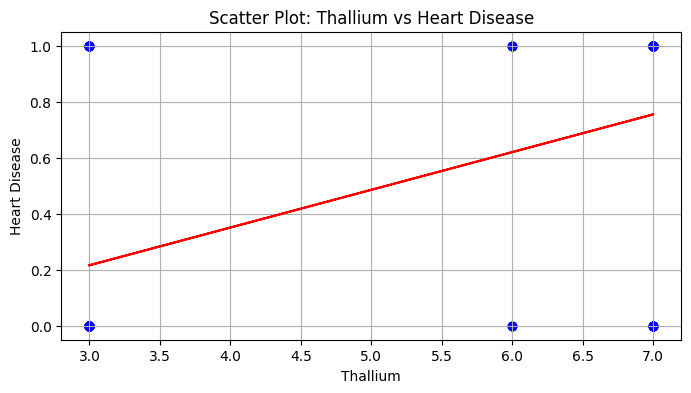

In [ ]:
target_variable = 'Heart Disease'
predictors = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results',
              'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# Loop to create a scatter plot with a linear regression line
for predictor in predictors:
  plt.figure(figsize=(8, 4))

  # training linear regression model
  model = LinearRegression()
  model.fit(df[[predictor]], df[target_variable])

  # Predict using model
  predicted = model.predict(df[[predictor]])

  # Make scatter plot
  plt.scatter(df[predictor], df[target_variable], color='blue', alpha=0.5)

  # Add line linear regression
  plt.plot(df[predictor], predicted, color='red')

  plt.title(f'Scatter Plot: {predictor} vs {target_variable}')
  plt.xlabel(predictor)
  plt.ylabel(target_variable)
  plt.grid(True)

  plt.show()